In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt


In [0]:
#Copied from https://python-data-science.readthedocs.io/en/latest/sl-deeplearning.html

def plot_validate(model, loss_acc):
    '''Plot model accuracy or loss for both train and test validation per epoch
    model = fitted model
    loss_acc = input 'loss' or 'acc' to plot respective graph
    '''
    history = model.history.history

    if loss_acc == 'loss':
        axis_title = 'loss'
        title = 'Loss'
        epoch = len(history['loss'])
    elif loss_acc == 'acc':
        axis_title = 'acc'
        title = 'Accuracy'
        epoch = len(history['loss'])

    plt.figure(figsize=(15,4))
    plt.plot(history[axis_title])
    plt.plot(history['val_' + axis_title])
    plt.title('Model ' + title)
    plt.ylabel(title)
    plt.xlabel('Epoch')

    plt.grid(b=True, which='major')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', alpha=0.2)

    plt.legend(['Train', 'Test'])
    plt.show()

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score_3x3_B_Train = model.evaluate(x_train, y_train, verbose=0)
score_3x3_B_Test = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', score_3x3_B_Train[0])
print('Train accuracy:', score_3x3_B_Train[1])
print('Test loss:', score_3x3_B_Test[0])
print('Test accuracy:', score_3x3_B_Test[1])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 157s 3ms/step - loss: 0.2631 - acc: 0.9190 - val_loss: 0.0582 - val_acc: 0.9803
Epoch 2/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0865 - acc: 0.9741 - val_loss: 0.0448 - val_acc: 0.9850
Epoch 3/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0654 - acc: 0.9802 - val_loss: 0.0371 - val_acc: 0.9872
Epoch 4/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0528 - acc: 0.9844 - val_loss: 0.0317 - val_acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0454 - acc: 0.9864 - val_loss: 0.0319 - val_acc: 0.9886
Epoch 6/12
60000/60000 [============

Plot on Given architecutre present in the assignment

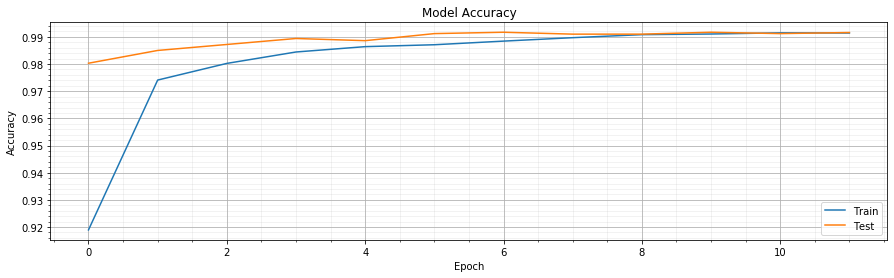

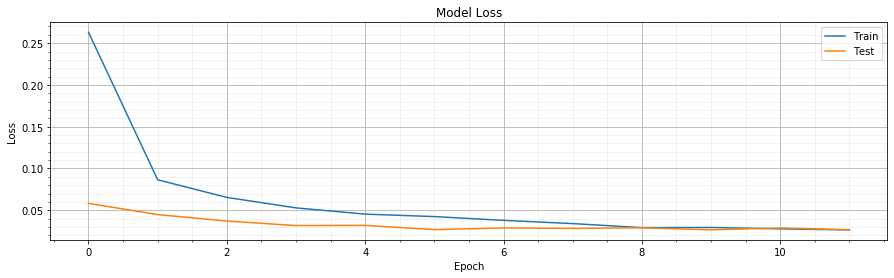

In [9]:
plot_validate(model, 'acc')
plot_validate(model, 'loss')

#### Assignment Task1:
#### Architecture as follows 
### 3x3 kernel + pool size (1,1)+ without dropuout feature + without Batch Normalization

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.1897 - acc: 0.9415 - val_loss: 0.0627 - val_acc: 0.9786
Epoch 2/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0503 - acc: 0.9848 - val_loss: 0.0572 - val_acc: 0.9815
Epoch 3/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0301 - acc: 0.9911 - val_loss: 0.0391 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0181 - acc: 0.9944 - val_loss: 0.0413 - val_acc: 0.9875
Epoch 5/12
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0117 - acc: 0.9966 - val_loss: 0.0371 - val_acc: 0.9881
Epoch 6/12
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0065 - acc: 0.9981 - val_loss: 0.0427 - val_acc: 0.9890
Epoch 7/12
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0047 - acc: 0.9988 - val_loss: 0.0401 - 

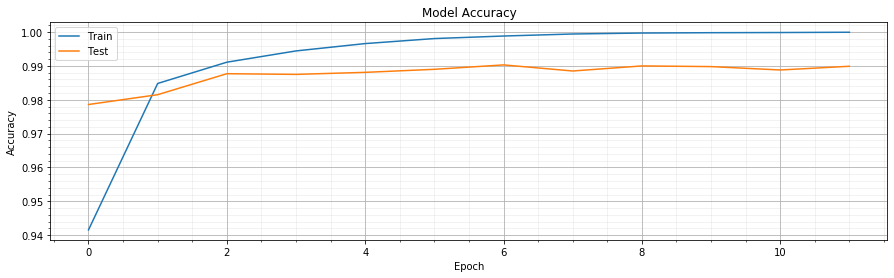

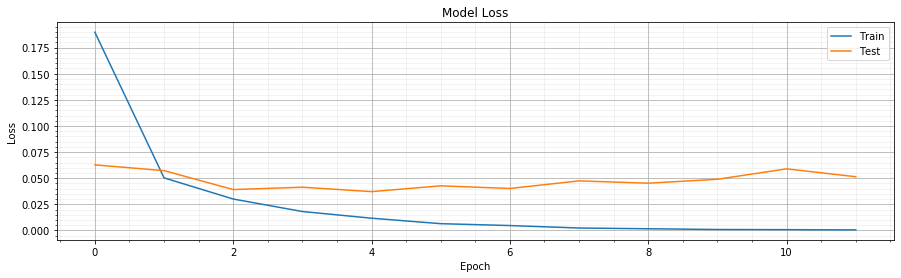

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score_3x3_Train = model.evaluate(x_train, y_train, verbose=0)
score_3x3_Test = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', score_3x3_Train[0])
print('Train accuracy:', score_3x3_Train[1])
print('Test loss:', score_3x3_Test[0])
print('Test accuracy:', score_3x3_Test[1])

plot_validate(model, 'acc')
plot_validate(model, 'loss')

Model without dropout and batch normalization has affect on Train loss and train accuracy. Here model looks like over fitted

#### Assignment Task2:
#### Architecture as follows 
### 5x5 kernel + without pool size+ with dropuout feature + with Batch Normalization

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 269s 4ms/step - loss: 0.1335 - acc: 0.9595 - val_loss: 0.0425 - val_acc: 0.9860
Epoch 2/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.0519 - acc: 0.9847 - val_loss: 0.0384 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 266s 4ms/step - loss: 0.0382 - acc: 0.9885 - val_loss: 0.0284 - val_acc: 0.9907
Epoch 4/12
60000/60000 [==============================] - 266s 4ms/step - loss: 0.0315 - acc: 0.9906 - val_loss: 0.0277 - val_acc: 0.9920
Epoch 5/12
60000/60000 [==============================] - 266s 4ms/step - loss: 0.0248 - acc: 0.9928 - val_loss: 0.0244 - val_acc: 0.9929
Epoch 6/12
60000/60000 [==============================] - 267s 4ms/step - loss: 0.0199 - acc: 0.9937 - val_loss: 0.0322 - val_acc: 0.9895
Epoch 7/12
60000/60000 [==============================] - 268s 4ms/step - loss: 0.0180 - acc: 0.9943 - val_loss: 0.0257 - 

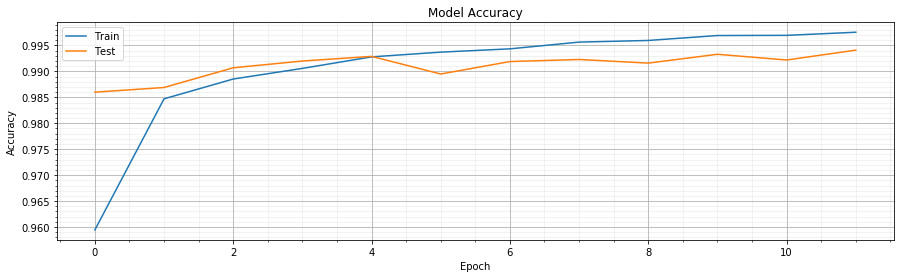

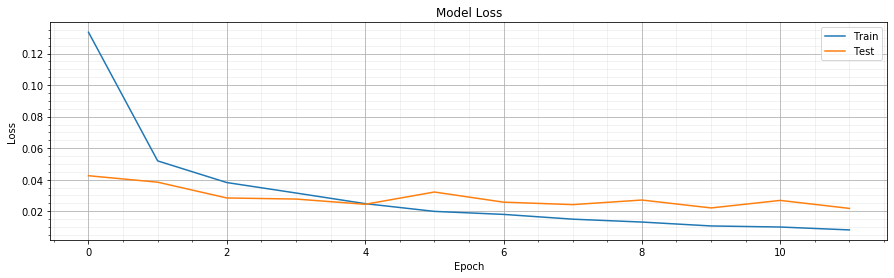

In [0]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score_5x5_Train = model.evaluate(x_train, y_train, verbose=0)
score_5x5_Test = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', score_5x5_Train[0])
print('Train accuracy:', score_5x5_Train[1])
print('Test loss:', score_5x5_Test[0])
print('Test accuracy:', score_5x5_Test[1])

plot_validate(model, 'acc')
plot_validate(model, 'loss')

Model without normalization and with dropout and batch normalization has affect on Train loss and train accuracy. Here model looks like over fitted

#### Assignment Task3:
#### Architecture as follows 
### 7x7 kernel + with pool size+ with dropuout feature + with batch normalization

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 283s 5ms/step - loss: 0.1844 - acc: 0.9439 - val_loss: 0.0435 - val_acc: 0.9863
Epoch 2/12
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0676 - acc: 0.9795 - val_loss: 0.0353 - val_acc: 0.9877
Epoch 3/12
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0491 - acc: 0.9850 - val_loss: 0.0329 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0411 - acc: 0.9874 - val_loss: 0.0209 - val_acc: 0.9931
Epoch 5/12
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0356 - acc: 0.9893 - val_loss: 0.0217 - val_acc: 0.9930
Epoch 6/12
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0307 - acc: 0.9903 - val_loss: 0.0195 - val_acc: 0.9928
Epoch 7/12
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0267 - acc: 0.9919 - val_loss: 0.0189 - 

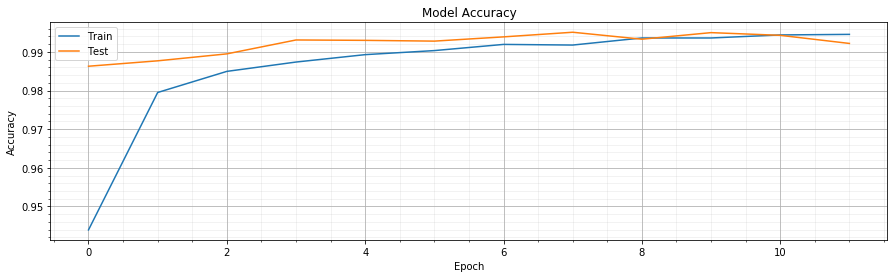

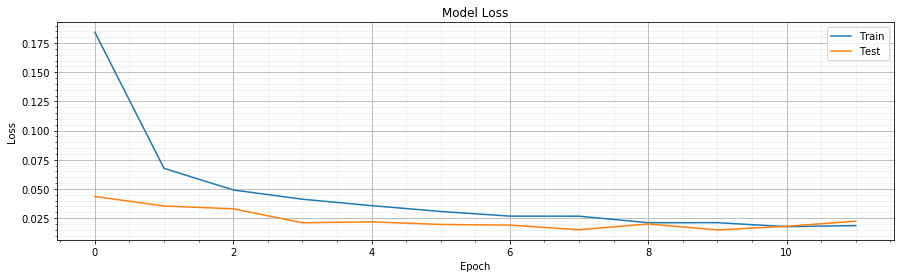

In [14]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score_7x7_Train = model.evaluate(x_train, y_train, verbose=0)
score_7x7_Test = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', score_7x7_Train[0])
print('Train accuracy:', score_7x7_Train[1])
print('Test loss:', score_7x7_Test[0])
print('Test accuracy:', score_7x7_Test[1])

plot_validate(model, 'acc')
plot_validate(model, 'loss')

I don't think this model is overfitted/Underfitted


In [10]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Kernel Size", "Model type", "Test Accuracy"]
x.add_row(["3X3", "With Pool size + Drop+BN", 0.9916])
x.add_row(["3X3", "With Pool size and without Drop+BN", 0.9899])
x.add_row(["5X5", "Without Pool size and with Drop+BN",0.9941])
x.add_row(["7X7", "With Pool size + Drop+BN",0.9922])
print(x)

+-------------+------------------------------------+---------------+
| Kernel Size |             Model type             | Test Accuracy |
+-------------+------------------------------------+---------------+
|     3X3     |      With Pool size + Drop+BN      |     0.9916    |
|     3X3     | With Pool size and without Drop+BN |     0.9899    |
|     5X5     | Without Pool size and with Drop+BN |     0.9941    |
|     7X7     |      With Pool size + Drop+BN      |     0.9922    |
+-------------+------------------------------------+---------------+
